<a href="https://colab.research.google.com/github/HoussamSlk/simple_tweets_sentiment_analysis/blob/main/Twitter_sentiment_analysis_program.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd 
import numpy as np 
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [5]:
#twitter api keys
consumerKey = ""
consumerSecret= ""
accessToken= ""
accessTokenSecret = ""

In [6]:
#Create the twitter Auth object 
authenticate = tweepy.OAuthHandler(consumerKey,consumerSecret)
#set the access token and access token secret 
authenticate.set_access_token(accessToken,accessTokenSecret)
#Create API object 
api = tweepy.API(authenticate,wait_on_rate_limit=True)

In [15]:
#Extract 100 Tweets from the twitter user 
query = '#ColumbusDay' #enter query / hashtag here  
max_tweets = 1000
searched_tweets = [status for status in tweepy.Cursor(api.search, q=query).items(max_tweets)]

In [18]:
all_tweets_text = [] 
for tweet in searched_tweets:
  all_tweets_text.append(tweet.text)

In [22]:
#clean the data 
def clean_text(text):
  text = re.sub(r'@[A-Za-z0-9]+','',text) #remove mentions
  text = re.sub(r'#','',text) #Remove hashtags symbol
  text = re.sub(r'RT[\s]+','',text) #remove RT 
  text = re.sub(r'https?:\/\/\S+','',text) #remove links
  return text

In [27]:
clean_tweets = [clean_text(item) for item in all_tweets_text]

In [39]:
df = pd.DataFrame(data={'tweets': clean_tweets})

In [32]:
#create a function to get the subjectivity : to determine how the text is subjective 
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#create a function to get the polarity to determine if the text is negative 
def getPolarity(text):
  return TextBlob(text).sentiment.polarity


In [40]:
df['subjectivity'] = df['tweets'].apply(getSubjectivity)
df['polarity'] = df['tweets'].apply(getPolarity)

In [41]:
df

,tweets,subjectivity,polarity
0,ColumbusDay,0.000000,0.0
1,: columbusday dayofrage,0.000000,0.0
2,Only Christopher we acknowledge is Wallace Col...,1.000000,0.0
3,: Happy ColumbusDay to the man who did somethi...,0.600000,0.3
4,: Il 12 ottobre 1492 Cristoforo Colombo sbarcò...,0.000000,0.0
...,...,...,...
995,": ""They all laughed at Christopher Columbus wh...",0.266667,0.4
996,_Flames1: ColumbusDay Queen Isabella's Jewels ...,0.000000,0.0
997,": Hj, 12/10, tb é feriado nos EUA, onde se com...",0.000000,0.0
998,": ""They all laughed at Christopher Columbus wh...",0.266667,0.4


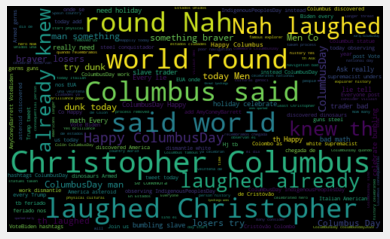

In [42]:
#plot word cloud
allWords = ' '.join(tweets for tweets in df['tweets'])
wordcloud = WordCloud(width = 500, height = 300, random_state=21,max_font_size=119).generate(allWords)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()